In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [2]:
df_seattle = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/weather/seattle_rain.csv'
)

In [3]:
df_stlouis = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/weather/stl_rain.csv'
)

In [4]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/tmp/ipykernel_1592/3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [5]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [6]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [7]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [8]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [9]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

In [10]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'STL'

In [11]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [12]:
df = df.rename(columns={'DATE': 'date'})

In [13]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [14]:
mean_day_precipitation = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

In [15]:
indices = np.where(df['precipitation'].isna() == True)[0]

In [16]:
for index in indices:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

In [17]:
df.to_csv('clean_seattle_stlouis_weather.csv', encoding='utf-8-sig', index=False)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


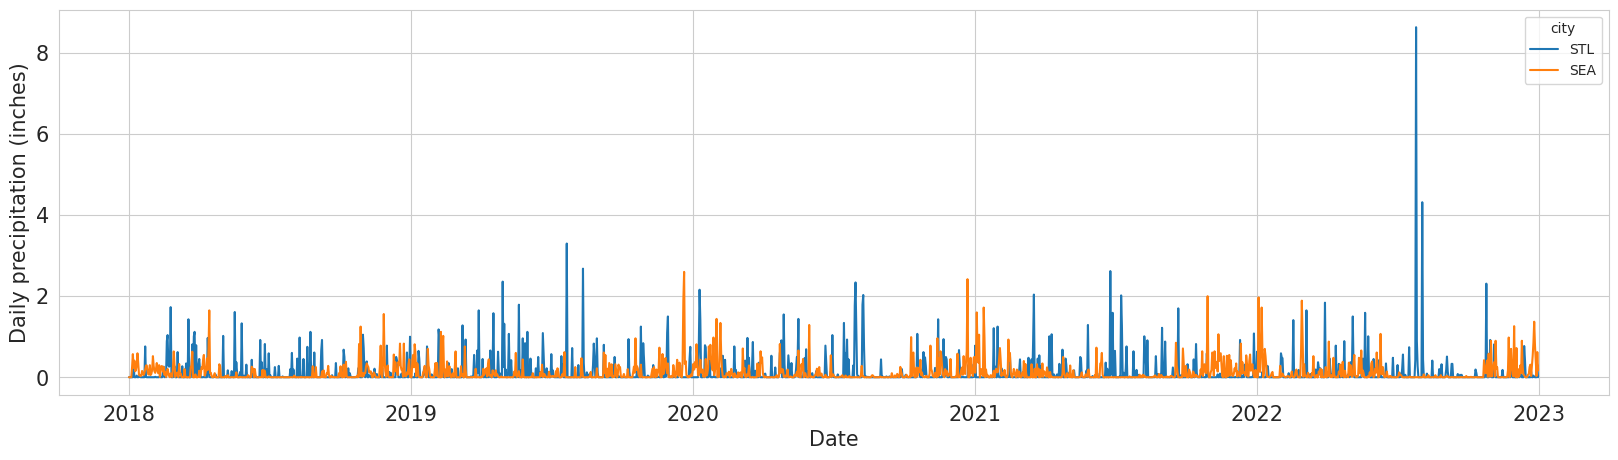

In [18]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

In [19]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64